In [67]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Functions

In [2]:
len([1,2,3])

3

In [3]:
len.__doc__

'Return the number of items in a container.'

In [4]:
def square():
    '''This function returns the square of 2'''
    return 2**2

In [5]:
square()

4

In [6]:
what_is_returned = square()

In [7]:
what_is_returned

4

In [8]:
square.__doc__

'This function returns the square of 2'

In [9]:
def square_with_argument(n):
    '''This function takes a number as its input and returns its square'''
    return n**2

In [10]:
square_with_argument(2)

4

In [11]:
square_with_argument(3)

9

In [12]:
n

NameError: name 'n' is not defined

In [13]:
def raise_to_power_with_multiple_arguments(n,i):
    '''This function takes two numbers as input and raise the first to the power of the second'''
    return n**i

In [14]:
raise_to_power_with_multiple_arguments(2,2)

4

In [15]:
raise_to_power_with_multiple_arguments(2,3)

8

In [16]:
raise_to_power_with_multiple_arguments(3,2)

9

In [17]:
def raise_to_power_with_default_arguments(n,i=2):
    '''This function takes two numbers as input and raise the first to the power of the second (by default 2)'''
    return n**i

In [18]:
raise_to_power_with_default_arguments(2)

4

In [19]:
raise_to_power_with_default_arguments(2,3)

8

#### apply custom functions to pandas dataframe

In [20]:
df = pd.DataFrame({'name':['Anna','Bob','Cecil'],
                  'income':[1000,300,600],
                  'num_children':[2,1,4]})
df

,name,income,num_children
0,Anna,1000,2
1,Bob,300,1
2,Cecil,600,4


In [21]:
def tax(row):
    if row['income'] < 500:
        tax_percent = 0.05
    elif row['income'] < 800:
        tax_percent = 0.1
    else:
        tax_percent = 0.2
        
    if row['num_children'] >= 3:
        tax_percent = tax_percent/2
        
    return row['income']*tax_percent

In [22]:
df['tax'] = df.apply(lambda x: tax(x), axis=1)

In [23]:
df

,name,income,num_children,tax
0,Anna,1000,2,200.0
1,Bob,300,1,15.0
2,Cecil,600,4,30.0


In [24]:
def iterrow_solution(df):
    new_col = []
    for index,row in df.iterrows():
        if row['income'] < 500:
            tax_percent = 0.05
        elif row['income'] < 800:
            tax_percent = 0.1
        else:
            tax_percent = 0.2

        if row['num_children'] >= 3:
            tax_percent = tax_percent/2
        new_col.append(row['income']*tax_percent)
    df['tax'] = new_col
    return df

In [25]:
df = pd.concat([df]*100)

In [26]:
len(df)

300

In [27]:
%timeit df['tax'] = df.apply(lambda x: tax(x), axis=1)

11.3 ms ± 1.16 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [28]:
%timeit iterrow_solution(df)

43.2 ms ± 6.67 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


#### clustering

http://stanford.edu/class/ee103/visualizations/kmeans/kmeans.html

In [282]:
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

In [45]:
iris = datasets.load_iris()
data = iris.data

 <img src="iris_petal_sepal.png" />

In [31]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [32]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [33]:
estimator = KMeans(init='k-means++', n_clusters=3)

In [34]:
estimator

KMeans(n_clusters=3)

In [35]:
estimator.fit(scale(data))

KMeans(n_clusters=3)

In [36]:
estimator.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [33]:
from collections import Counter

In [38]:
Counter(estimator.labels_)

Counter({1: 50, 2: 47, 0: 53})

In [39]:
estimator.cluster_centers_

array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

In [40]:
import seaborn as sns
import pandas as pd

In [41]:
centers = pd.DataFrame(estimator.cluster_centers_)
centers.columns = iris.feature_names
centers

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.050220,-0.883376,0.347738,0.281527
1,-1.014579,0.853263,-1.304987,-1.254893
2,1.135970,0.088422,0.996155,1.017526


(3.5, -0.5)

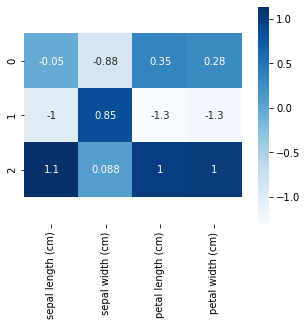

In [42]:

ax = sns.heatmap(centers, annot=True, cmap='Blues', square=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

#### visualize clusters

In [31]:
import matplotlib

In [44]:
cmap = matplotlib.cm.get_cmap('winter')

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

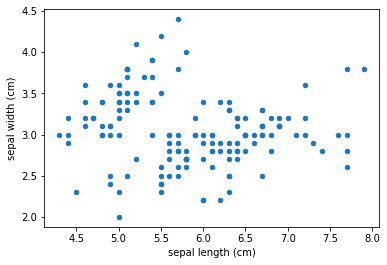

In [45]:
iris_df.plot.scatter(x=iris_df.columns[0], y=iris_df.columns[1])

In [46]:
estimator.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

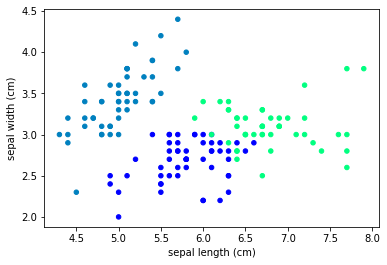

In [47]:
iris_df.plot.scatter(x=iris_df.columns[0],
                     y=iris_df.columns[1], 
                     c=estimator.labels_, 
                     cmap=cmap, 
                     colorbar=False)


In [30]:
from itertools import combinations

In [49]:
xy_toplot = list(combinations(iris_df.columns,2))
xy_toplot

[('sepal length (cm)', 'sepal width (cm)'),
 ('sepal length (cm)', 'petal length (cm)'),
 ('sepal length (cm)', 'petal width (cm)'),
 ('sepal width (cm)', 'petal length (cm)'),
 ('sepal width (cm)', 'petal width (cm)'),
 ('petal length (cm)', 'petal width (cm)')]

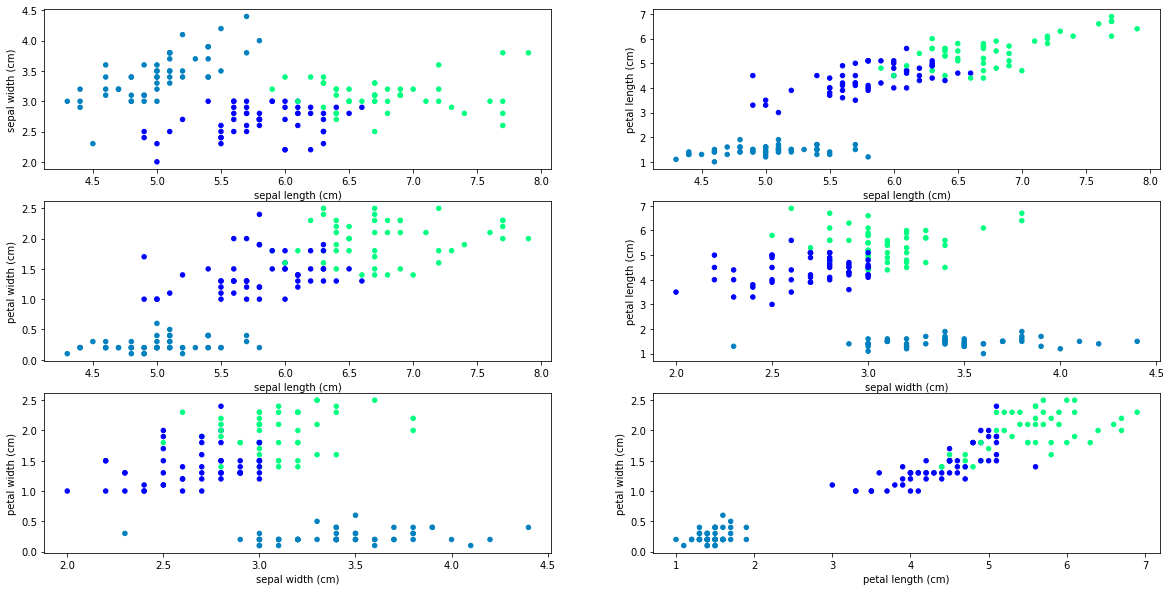

In [50]:
fig, axes = plt.subplots(nrows=len(xy_toplot)//2,ncols=2, figsize=(20,10))
i = 0
for x_ax, y_ax in xy_toplot:
    iris_df.plot.scatter(x=x_ax,
                         y=y_ax, 
                         c=estimator.labels_, 
                         cmap=cmap, 
                         ax=axes[i//2, i%2],
                         colorbar=False)
    i += 1
plt.show()

#### choosing the k

In [51]:
dists = []
for cluster_num in range(2,7):
    estimator = KMeans(init='k-means++', n_clusters=cluster_num)
    estimator.fit(data)
    dists.append(estimator.inertia_)

In [52]:
dists

[152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.44618205128204,
 39.23730158730161]

In [53]:
pd.DataFrame({'dists':dists, 'n_clusters':list(range(2,7))})

,dists,n_clusters
0,152.347952,2
1,78.851441,3
2,57.228473,4
3,46.446182,5
4,39.237302,6


<AxesSubplot:xlabel='n_clusters'>

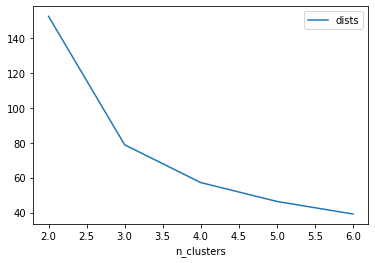

In [54]:
pd.DataFrame({'dists':dists, 'n_clusters':list(range(2,7))}).plot(x='n_clusters',y='dists')

#### initializing the cluster centers

In [55]:
estimator = KMeans(init='k-means++', n_clusters=3)
estimator_rand = KMeans(init='random', n_clusters=3)

In [56]:
estimator.fit(data)
estimator_rand.fit(data)

KMeans(init='random', n_clusters=3)

In [57]:
pca = PCA(n_components=3).fit(data)

In [58]:
pca.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143]])

In [59]:
pca = PCA(n_components=3).fit(data)
estimator_pca = KMeans(init=pca.components_, n_clusters=3)
estimator_pca.fit(data)

C:\Users\Gyongyver\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1035: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


KMeans(init=array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102],
       [-0.58202985,  0.59791083,  0.07623608,  0.54583143]]),
       n_clusters=3)

#### finding the best parameters

In [15]:
def fit_kmeans(data, num_clusters, init_method):
    if init_method == 'pca':
        pca = PCA(n_components=num_clusters).fit(data)
        estimator = KMeans(init=pca.components_, n_clusters=num_clusters)
    else:
        estimator = KMeans(init=init_method, n_clusters=num_clusters)
    
    estimator.fit(data)
    return estimator

In [24]:
def print_metrics(data, estimator):
    print('Cluster sizes: ', Counter(estimator.labels_).values())

In [25]:
def draw_cluster_plot(iris_df, estimator, figsize=(20,10), cmap_name='winter'):
    cmap = matplotlib.cm.get_cmap(cmap_name)
    xy_toplot = list(combinations(iris_df.columns,2))
    fig, axes = plt.subplots(nrows=len(xy_toplot)//2,ncols=2, figsize=figsize)
    i = 0
    for x_ax, y_ax in xy_toplot:
        iris_df.plot.scatter(x=x_ax, y=y_ax, c=estimator.labels_, cmap=cmap, ax=axes[i//2, i%2],colorbar=False)
        i += 1
    plt.show()

In [63]:
dists_dict = {}

iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
data = scale(iris_df)

for init_method in ['k-means++','random','pca']:
    print(init_method)
    dists_dict[init_method] = []
    for i in range(2,5):      
        estimator = fit_kmeans(data, i, init_method)
        print_metrics(iris_df,estimator)
        dists_dict[init_method].append(estimator.inertia_)

k-means++
Cluster sizes:  dict_values([50, 100])
Cluster sizes:  dict_values([50, 47, 53])
Cluster sizes:  dict_values([28, 22, 47, 53])
random
Cluster sizes:  dict_values([50, 100])
Cluster sizes:  dict_values([50, 47, 53])
Cluster sizes:  dict_values([25, 25, 51, 49])
pca
Cluster sizes:  dict_values([50, 100])
Cluster sizes:  dict_values([34, 23, 93])
Cluster sizes:  dict_values([26, 24, 51, 49])


C:\Users\Gyongyver\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1035: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
C:\Users\Gyongyver\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1035: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
C:\Users\Gyongyver\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1035: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


In [64]:
pd.DataFrame(dists_dict).set_index(pd.Index(range(2,5)))

,k-means++,random,pca
2,222.361705,222.361705,222.361705
3,139.820496,139.820496,191.652874
4,114.092547,114.353763,114.353853


<AxesSubplot:>

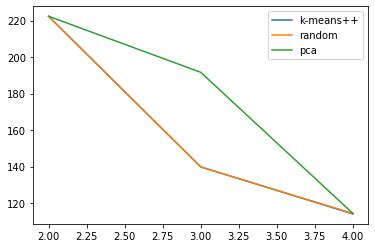

In [65]:
pd.DataFrame(dists_dict).set_index(pd.Index(range(2,5))).plot()

k-means++


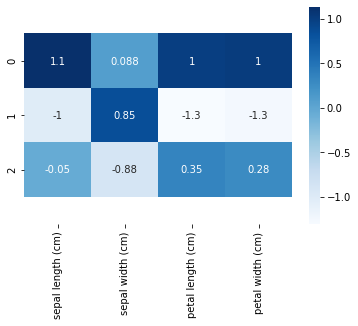

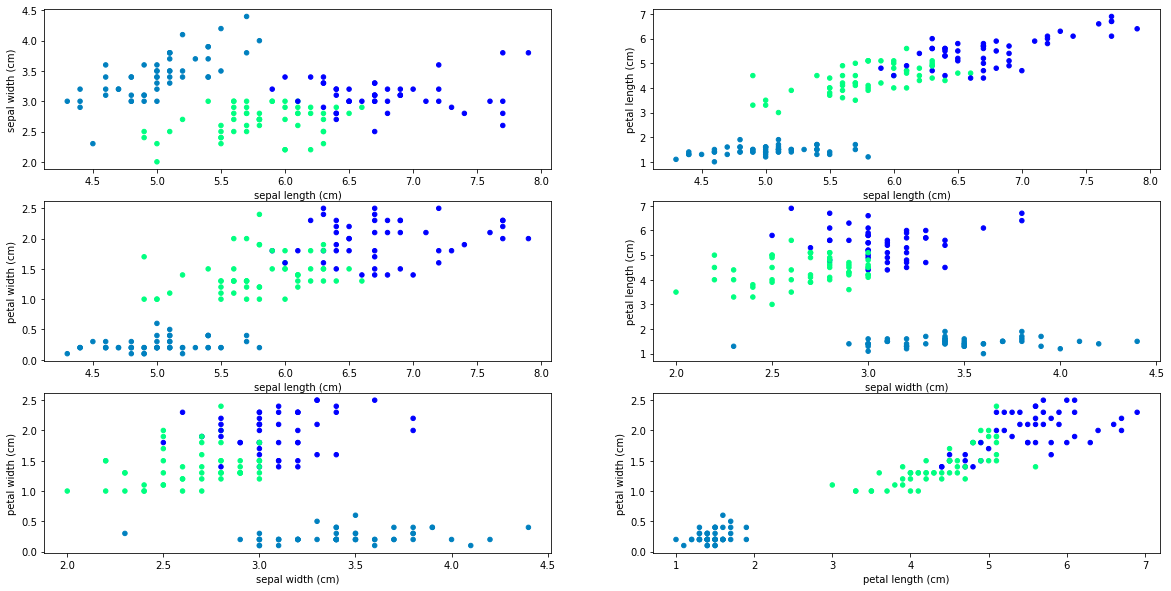

random


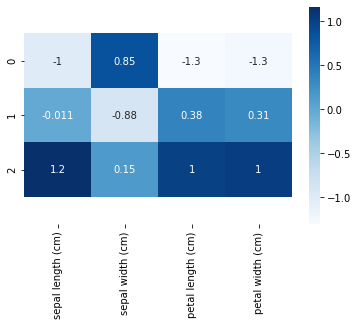

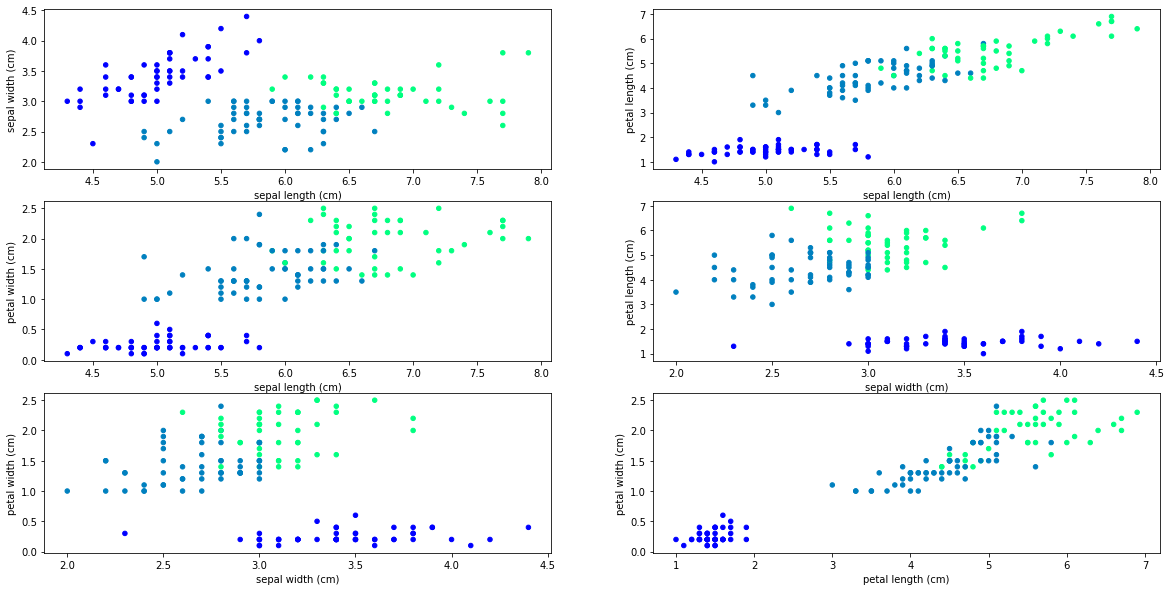

pca


C:\Users\Gyongyver\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1035: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


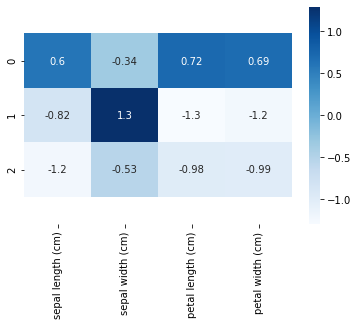

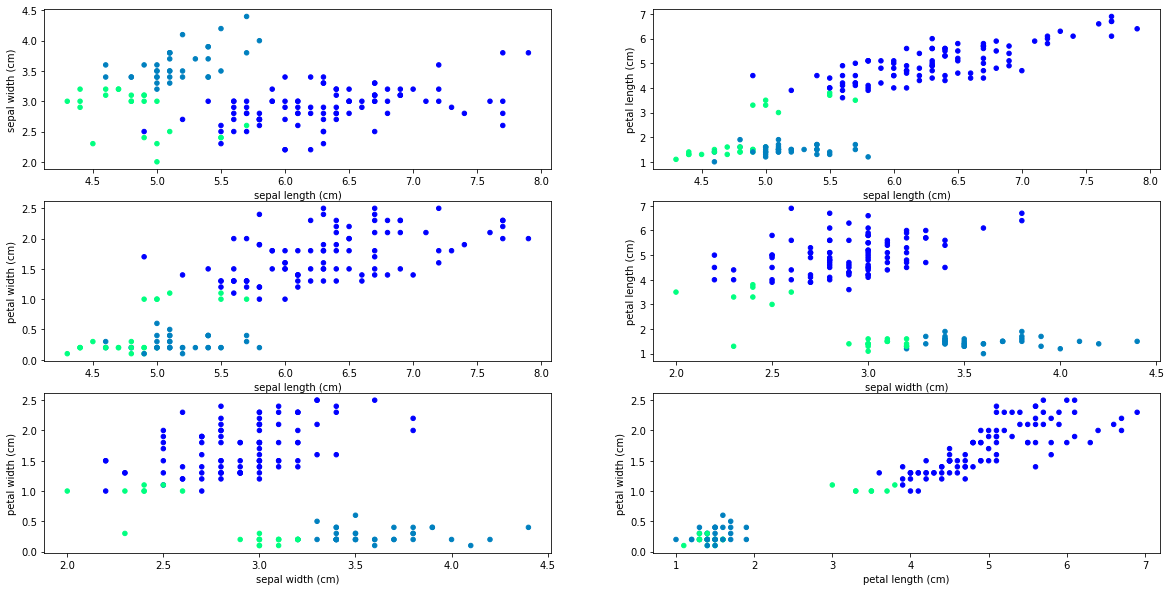

In [66]:
for init_method in ['k-means++','random','pca']:
    print(init_method)
    estimator = fit_kmeans(data, 3, init_method)
    centers = pd.DataFrame(estimator.cluster_centers_)
    centers.columns = iris.feature_names
    ax = sns.heatmap(centers, annot=True, cmap='Blues')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()
    draw_cluster_plot(iris_df, estimator)

### 1 - exercise

- Read the trip and station csv-s into pandas dataframes. <br>
- Calculate the duration of each trip in minutes. For this you'll have to transform the end_date and start_date columns into datetime format and substract the latter from the former. To get the time difference in minutes convert the result to timedelta64[m] format. <br>
- Draw a histogram of the durations to see if there are any extreme values

In [1]:
import pandas as pd
trip = pd.read_csv('trip.csv')
station = pd.read_csv('station.csv')

def duration(row):
    '''Calcualte the duration of each trip in minutes'''
    diff = pd.to_datetime(row['end_date'])-pd.to_datetime(row['start_date'])
    row['duration'] = diff.total_seconds()/60
    return row['duration']

In [87]:
trip['duration'] = trip.apply(lambda x: duration(x), axis=1)

<Figure size 2160x1800 with 0 Axes>

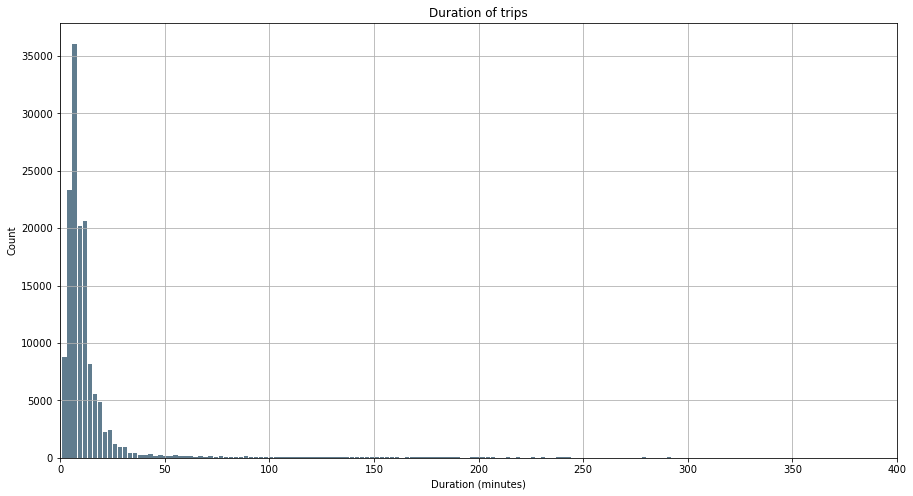

<Figure size 2160x1800 with 0 Axes>

In [88]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
trip['duration'].plot.hist(grid=True, bins=5000, rwidth=0.9,
                   color='#607c8e')
plt.title('Duration of trips')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
#plt.grid(axis='y', alpha=0.75)
plt.xlim(xmax=400, xmin=0)
plt.figure(figsize=(30,25))

### 1 - check yourslef

In [89]:
if trip['duration'].sum() == 2953335:
    print('The duration column is correct')
else:
    print('The duration column is NOT correct')

The duration column is correct


### 2 - exercise
it looks like that people take the bycicles for unreasonably long times. Let's change the duration value to np.nan where it's higher than 300 minutes.

In [90]:
import numpy as np
trip['duration'].values[trip['duration'].values > 300] = np.nan

In [91]:
# Self check
sum(trip['duration']>300)

0

### 2 - check yourself

In [92]:
if trip['duration'].sum() == 2069201:
    print('The duration column is correct')
else:
    print('The duration column is NOT correct')

The duration column is correct


### 3 - exercise

By merging the trip and station dataframes, create a new dataframe called dist_df where for each trip the latitude and the longitude is given for both start and end stations. These columns should be called lat1, lon1 for the start station and lat2, lon2 for the end station <br>
Hint: You'll have to do multiple merges, and rename some columns

In [93]:
dist_df = trip.merge( station, how='left', left_on='Start Station', right_on='name')
dist_df.rename(columns={'station_id':'station_id1','name':'name1', 'lat':'lat1','long':'long1',
                        'dockcount':'dockcount1', 'installation':'installation1','zip_code':'zip_code1'}, inplace=True)


In [94]:
dist_df = dist_df.merge(station, how='left', left_on='End Station', right_on='name')
dist_df.rename(columns={'station_id':'station_id2','name':'name2', 'lat':'lat2','long':'long2',
                        'dockcount':'dockcount2', 'installation':'installation2','zip_code':'zip_code2'}, inplace=True)

In [95]:
dist_df.columns

Index(['Trip ID', 'Start Date', 'Start Station', 'Start Terminal', 'End Date',
       'End Station', 'End Terminal', 'Bike #', 'Subscription Type',
       'start_date', 'end_date', 'date_to_join', 'duration', 'station_id1',
       'name1', 'lat1', 'long1', 'dockcount1', 'installation1', 'zip_code1',
       'station_id2', 'name2', 'lat2', 'long2', 'dockcount2', 'installation2',
       'zip_code2'],
      dtype='object')

### 3 - check yourself

In [96]:
if int(dist_df['lat1'].sum()) == 5434836 and int(dist_df['lat2'].sum())==5434810:
    print('The new columns are correct')
else:
    print('The new columns are NOT correct')

The new columns are correct


### 4 - exercise
There is a code snippet below that calculates the distance between two places given their coordinates (a_latitude, a_longitude, b_latitude, b_longitude). Write a function that takes a row from the trip dataframe as input and returns the calculated distance between ths start and the end stations as output. <br>
Using the apply method, call this function on the dist_df dataframe and calculate a new column called dist.

In [60]:
from math import sin, cos, sqrt, atan2, radians

R = 6373.0

lat1 = radians(a_latitude)
lon1 = radians(a_longitude)
lat2 = radians(b_latitude)
lon2 = radians(b_longitude)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

NameError: name 'a_latitude' is not defined

In [100]:
from math import sin, cos, sqrt, atan2, radians
def calculate_dist(row):
    R = 6373.0

    lat1 = radians(row['lat1'])
    lon1 = radians(row['long1'])
    lat2 = radians(row['lat2'])
    lon2 = radians(row['long2'])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    row['dist'] = R * c
    return row['dist']



In [101]:
dist_df['dist'] = dist_df.apply(lambda x: calculate_dist(x), axis=1)

### 4 - check yourself

In [102]:
if int(dist_df['dist'].max()) == 68:
    print('The new column is correct')
else:
    print('The new column is NOT correct')

The new column is correct


### 5 - exercise
Create a new column in the dist_df called speed. Calculate the values by dividing the distance by the duration. <br>
Draw a histogram of the speed column to see if there are extreme values

In [103]:
dist_df['speed'] = dist_df['dist']/dist_df['duration']


In [104]:
dist_df.head()

,Trip ID,Start Date,Start Station,Start Terminal,End Date,End Station,End Terminal,Bike #,Subscription Type,start_date,...,zip_code1,station_id2,name2,lat2,long2,dockcount2,installation2,zip_code2,dist,speed
0,4576,8/29/2013 14:13,South Van Ness at Market,66,8/29/2013 14:14,South Van Ness at Market,66,520,Subscriber,2013-08-29 14:13:00,...,94143,66,South Van Ness at Market,37.774814,-122.418954,19,8/23/2013,94143,0.000000,0.000000
1,4607,8/29/2013 14:42,San Jose City Hall,10,8/29/2013 14:43,San Jose City Hall,10,661,Subscriber,2013-08-29 14:42:00,...,95108,10,San Jose City Hall,37.337391,-121.886995,15,8/6/2013,95108,0.000000,0.000000
2,4130,8/29/2013 10:16,Mountain View City Hall,27,8/29/2013 10:17,Mountain View City Hall,27,48,Subscriber,2013-08-29 10:16:00,...,94085,27,Mountain View City Hall,37.389218,-122.081896,15,8/16/2013,94085,0.000000,0.000000
3,4251,8/29/2013 11:29,San Jose City Hall,10,8/29/2013 11:30,San Jose City Hall,10,26,Subscriber,2013-08-29 11:29:00,...,95108,10,San Jose City Hall,37.337391,-121.886995,15,8/6/2013,95108,0.000000,0.000000
4,4299,8/29/2013 12:02,South Van Ness at Market,66,8/29/2013 12:04,Market at 10th,67,319,Subscriber,2013-08-29 12:02:00,...,94143,67,Market at 10th,37.776619,-122.417385,27,8/23/2013,94159,0.243591,0.121796


(0.0, 1.2)

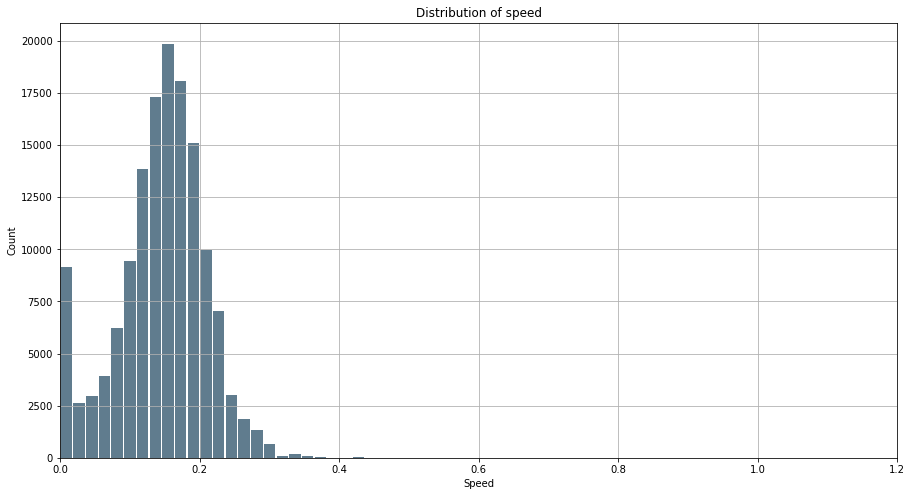

In [105]:
# Histogram
plt.figure(figsize=(15,8))
dist_df['speed'].plot.hist(grid=True, bins=500, rwidth=0.9,
                   color='#607c8e')
plt.title('Distribution of speed')
plt.xlabel('Speed')
plt.ylabel('Count')
#plt.grid(axis='y', alpha=0.75)
plt.xlim(xmax=1.2, xmin=0)

### 5 - check yourslef

In [106]:
if int(dist_df['speed'].max()) == 9:
    print('The new column is correct')
else:
    print('The new column is NOT correct')

The new column is correct


### 6 - exercise
It looks like that there was a very fast trip. Let's assume that it's a data error and filter the row where the speed is above 1. <br>
Also replace the 0 values in the speed column by np.nan-s

In [107]:
dist_df = dist_df[dist_df['speed']<=1]
dist_df['speed'].values[dist_df['speed'].values == 0] = np.nan


(142863, 29)

### 6 - check yourslef

In [108]:
if dist_df['speed'].max() < 1 and dist_df['speed'].min() > 0:
    print('The speed column is correct')
else:
    print('The speed column is NOT correct')

The speed column is correct


### 7 - exercise
- Create a new column in the trip dataframe called circle. The value should be circle if the start and the end station is the same and no_circle otherwise. 
- Create a new dataframe called circle ratio where there is a row for each station and a column for the circle/not_circle ratio of all trips starting at that station. You'll have to group the trip dataframe and pivot the grouped dataframe.
- Similarly, create a dataframe called subs_ratio where the trips made by customers/ trips made by subscribers ratio can be found for all stations
- As an advanced task create a function that takes the trip dataframe, the name of the column to group by and the name of the column to calculate the ratio from and returns the transformed dataframe 

In [124]:
def is_circle(row):
    if row['Start Station']==row['End Station']:
        row['circle']='circle'
    else:
        row['circle']='no_circle'
    return row['circle']

In [125]:
dist_df['circle'] = dist_df.apply(lambda x: is_circle(x), axis=1)

In [2]:
#Dani's code
trip["circle"] = trip.apply(lambda x: "circle" if x["Start Station"] == x["End Station"] else "not circle" , axis=1)
circle_ratio = trip.groupby(by=["Start Station", "circle"], axis=0).size().reset_index()
circle_ratio = circle_ratio.pivot(index='Start Station', columns='circle', values=0).reset_index()

In [4]:
circle_ratio

circle,Start Station,circle,not circle
0,2nd at Folsom,74.0,3702.0
1,2nd at South Park,146.0,4309.0
2,2nd at Townsend,183.0,4804.0
3,5th at Howard,122.0,2513.0
4,Adobe on Almaden,31.0,303.0
...,...,...,...
64,Temporary Transbay Terminal (Howard at Beale),104.0,5008.0
65,Townsend at 7th,125.0,4368.0
66,University and Emerson,269.0,165.0
67,Washington at Kearney,89.0,1383.0


In [267]:
circle_ratio = dist_df.groupby(['Start Station','circle']).count().pivot_table(index='Start Station', 
                                                                               columns='circle', values='Trip ID').reset_index()

circle_ratio['circle_per_not_circle'] = circle_ratio['circle']/circle_ratio['no_circle']
circle_ratio

circle,Start Station,circle,no_circle,circle_per_not_circle
0,2nd at Folsom,70.0,3697.0,0.018934
1,2nd at South Park,142.0,4304.0,0.032993
2,2nd at Townsend,177.0,4797.0,0.036898
3,5th at Howard,105.0,2501.0,0.041983
4,Adobe on Almaden,30.0,301.0,0.099668
...,...,...,...,...
64,Temporary Transbay Terminal (Howard at Beale),98.0,5002.0,0.019592
65,Townsend at 7th,121.0,4362.0,0.027740
66,University and Emerson,257.0,161.0,1.596273
67,Washington at Kearney,79.0,1362.0,0.058003


In [268]:
subs_ratio = dist_df.groupby(['Start Station','Subscription Type']).count().pivot_table(index='Start Station', 
                                                                               columns='Subscription Type', values='Trip ID').reset_index()

subs_ratio['Customer_per_Subscriber']=subs_ratio['Customer']/subs_ratio['Subscriber']
subs_ratio

Subscription Type,Start Station,Customer,Subscriber,Customer_per_Subscriber
0,2nd at Folsom,418,3349,0.124813
1,2nd at South Park,528,3918,0.134763
2,2nd at Townsend,872,4102,0.212579
3,5th at Howard,579,2027,0.285644
4,Adobe on Almaden,72,259,0.277992
...,...,...,...,...
64,Temporary Transbay Terminal (Howard at Beale),416,4684,0.088813
65,Townsend at 7th,512,3971,0.128935
66,University and Emerson,312,106,2.943396
67,Washington at Kearney,533,908,0.587004


### 7 - check yourself

In [269]:
if len(subs_ratio) == len(circle_ratio) == 69:
    print('The dataframes are correct')
else:
    print('The dataframes are NOT correct')

The dataframes are correct


### 8 - exercise
- Create a new dataframe where the average trip duration and speed is given for each start station. You can get this dataframe from the dist_df you've created above
- Create another one where the number of trips is given for each start station
- Merge these two dataframes with the station dataframe and also merge the circle_ratio and subs_ratio datagrames to it. At the end you should have one dataframe called features_df where there is a row for all the stations and columns for the:
    - dockcount
    - average duration
    - average speed
    - number of trips
    - ratio of customers/subscribers
    - ratio of circle trips/not circle trips <br>
- Call these columns to ['Start Station','dockcount', 'duration', 'speed', 'trip_num','circle_per_not_circle', 'Customer_per_Subscriber'] and drop the other columns

In [270]:
# Part 1
mean_df = dist_df.groupby('Start Station').mean()[['duration','speed']]
mean_df


,duration,speed
Start Station,,
2nd at Folsom,8.875232,0.150016
2nd at South Park,10.053981,0.157008
2nd at Townsend,12.242863,0.164938
5th at Howard,13.450499,0.148370
Adobe on Almaden,10.918429,0.134878
...,...,...
Temporary Transbay Terminal (Howard at Beale),10.073529,0.148166
Townsend at 7th,10.402855,0.182102
University and Emerson,57.851675,0.150234


In [271]:
num_trips = pd.DataFrame(dist_df.groupby('Start Station')['Trip ID'].count()).reset_index().rename(columns={'Trip ID':'trip_num'})
num_trips

,Start Station,trip_num
0,2nd at Folsom,3767
1,2nd at South Park,4446
2,2nd at Townsend,4974
3,5th at Howard,2606
4,Adobe on Almaden,331
...,...,...
64,Temporary Transbay Terminal (Howard at Beale),5100
65,Townsend at 7th,4483
66,University and Emerson,418
67,Washington at Kearney,1441


In [276]:
features_df = station.merge(mean_df,how='left', left_on = 'name',right_on='Start Station' )
features_df = features_df.merge(num_trips,how='left', left_on = 'name',right_on='Start Station')
features_df = features_df.merge(circle_ratio,how='left', left_on = 'name',right_on='Start Station')
features_df = features_df.merge(subs_ratio,how='left', left_on = 'name',right_on='Start Station')
features_df.head()

,station_id,name,lat,long,dockcount,installation,zip_code,duration,speed,Start Station_x,trip_num,Start Station_y,circle,no_circle,circle_per_not_circle,Start Station,Customer,Subscriber,Customer_per_Subscriber
0,2,San Jose Diridon Caltrain Station,37.329732,-121.901782,27,8/6/2013,95112,10.074924,0.160343,San Jose Diridon Caltrain Station,1962,San Jose Diridon Caltrain Station,63.0,1899.0,0.033175,San Jose Diridon Caltrain Station,212,1750,0.121143
1,3,San Jose Civic Center,37.330698,-121.888979,15,8/5/2013,95121,27.798817,0.105868,San Jose Civic Center,338,San Jose Civic Center,77.0,261.0,0.295019,San Jose Civic Center,176,162,1.086420
2,4,Santa Clara at Almaden,37.333988,-121.894902,11,8/6/2013,95155,8.010626,0.152166,Santa Clara at Almaden,847,Santa Clara at Almaden,28.0,819.0,0.034188,Santa Clara at Almaden,86,761,0.113009
3,5,Adobe on Almaden,37.331415,-121.893200,19,8/5/2013,95121,10.918429,0.134878,Adobe on Almaden,331,Adobe on Almaden,30.0,301.0,0.099668,Adobe on Almaden,72,259,0.277992
4,6,San Pedro Square,37.336721,-121.894074,15,8/7/2013,94089,12.853521,0.126054,San Pedro Square,710,San Pedro Square,60.0,650.0,0.092308,San Pedro Square,182,528,0.344697


In [277]:
# drop the other columns
features_df.drop(['name','station_id','lat', 'long','installation', 'zip_code','Start Station_x','Start Station_y', 'circle','no_circle','Customer','Subscriber'], axis=1, inplace=True)
features_df

,dockcount,duration,speed,trip_num,circle_per_not_circle,Start Station,Customer_per_Subscriber
0,27,10.074924,0.160343,1962,0.033175,San Jose Diridon Caltrain Station,0.121143
1,15,27.798817,0.105868,338,0.295019,San Jose Civic Center,1.086420
2,11,8.010626,0.152166,847,0.034188,Santa Clara at Almaden,0.113009
3,19,10.918429,0.134878,331,0.099668,Adobe on Almaden,0.277992
4,15,12.853521,0.126054,710,0.092308,San Pedro Square,0.344697
...,...,...,...,...,...,...,...
64,19,17.431997,0.143764,4963,0.039154,Market at 4th,0.362713
65,27,13.175841,0.146035,5886,0.021698,Market at Sansome,0.189812
66,15,17.652174,0.110022,23,NaN,San Jose Government Center,0.916667
67,15,12.895522,0.168072,201,0.030769,Broadway St at Battery St,0.110497


In [275]:
features_df.max()

name                       Yerba Buena Center of the Arts (3rd @ Howard)
dockcount                                                             27
duration                                                       57.851675
speed                                                           0.235278
trip_num                                                            9802
circle_per_not_circle                                           1.596273
Start Station              Yerba Buena Center of the Arts (3rd @ Howard)
Customer_per_Subscriber                                         2.943396
dtype: object

### 8 - check yourself

In [274]:
if dict(features_df.max()) == {'Customer_per_Subscriber': 3.0943396226415096,
 'Start Station': 'Yerba Buena Center of the Arts (3rd @ Howard)',
 'circle_per_not_circle': 1.6303030303030304,
 'dockcount': 27,
 'duration': 57.85167464114833,
 'speed': 0.23527836032786675,
 'trip_num': 9836}:
    print('The dataframe is correct')
else:
    print('The dataframe is NOT correct')

The dataframe is NOT correct


### 9 - exercise

Use K-means clustering on the feature_df (without hte Start Station column) to find clusters among the stations. Experiment with the init_method and the number of clusters. You can also exclude columns. <br>
When you find a method that gives meaningful clusters, visualize it and write one sentence about each cluster that describes what makes it different from the other ones. <br><br>
As an advanced task write functions that you can call with different parameters

In [87]:
import pandas as pd
features_df = pd.read_csv('features_df.csv')
data = features_df.drop(['Start Station','Unnamed: 0'], axis=1)
data

,dockcount,duration,speed,trip_num,circle_per_not_circle,Customer_per_Subscriber
0,27,10.074924,0.160343,1962,0.033175,0.121143
1,15,27.798817,0.105868,338,0.295019,1.086420
2,11,8.010626,0.152166,847,0.034188,0.113009
3,19,10.918429,0.134878,331,0.099668,0.277992
4,15,12.853521,0.126054,710,0.092308,0.344697
...,...,...,...,...,...,...
64,19,17.431997,0.143764,4963,0.039154,0.362713
65,27,13.175841,0.146035,5886,0.021698,0.189812
66,15,17.652174,0.110022,23,NaN,0.916667
67,15,12.895522,0.168072,201,0.030769,0.110497


In [88]:
import seaborn as sns
from sklearn import datasets
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [89]:
data.dtypes
#features_df.to_csv('features_df.csv')
# count NAN-s
data.isna().sum()
data = data.dropna()
data = scale(data)

 chossing the number of clusters

In [90]:
dists = []
for cluster_num in range(2,10):
    estimator = KMeans(init='k-means++', n_clusters=cluster_num)
    estimator.fit(data)
    dists.append(estimator.inertia_)

In [91]:
pd.DataFrame({'dists':dists, 'n_clusters':list(range(2,10))})

,dists,n_clusters
0,272.192746,2
1,199.991506,3
2,156.670550,4
3,131.123937,5
4,111.803136,6
5,101.864430,7
6,85.283054,8
7,78.639281,9


<AxesSubplot:xlabel='n_clusters'>

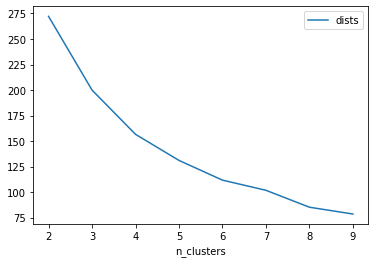

In [92]:
pd.DataFrame({'dists':dists, 'n_clusters':list(range(2,10))}).plot(x='n_clusters',y='dists')

In [93]:
data

array([[ 2.28932858e+00, -8.25248834e-01,  4.33448981e-01,
        -8.12608204e-02, -4.18962829e-01, -5.98646580e-01],
       [-6.89021224e-01,  1.50020003e+00, -1.90812738e+00,
        -8.58018033e-01,  8.73178534e-01,  1.81021642e+00],
       [-1.68180449e+00, -1.09609334e+00,  8.19649426e-02,
        -6.14563956e-01, -4.13965483e-01, -6.18944247e-01],
       [ 3.03762045e-01, -7.14577392e-01, -6.61164097e-01,
        -8.61366124e-01, -9.08374205e-02, -2.07226492e-01],
       [-6.89021224e-01, -4.60685215e-01, -1.04045729e+00,
        -6.80090888e-01, -1.27157799e-01, -4.07639317e-02],
       [-6.89021224e-01, -6.89532779e-01, -6.72998099e-01,
        -6.65263626e-01, -3.01090763e-01, -4.65926085e-01],
       [-6.89021224e-01, -6.54535084e-01, -7.05337698e-01,
        -7.36051845e-01, -6.80620328e-02, -4.30863381e-01],
       [-6.89021224e-01,  1.79548732e-01, -2.79779181e-01,
        -7.84838320e-01,  4.80011729e-01,  1.75821595e-01],
       [-6.89021224e-01, -7.60849902e-01, -3.823

compare methods

In [94]:
dists_dict = {}

for init_method in ['k-means++','random','pca']:
    print(init_method)
    dists_dict[init_method] = []
    for i in range(2,7):      
        estimator = fit_kmeans(data, i, init_method)
        print_metrics(features_df,estimator)
        dists_dict[init_method].append(estimator.inertia_)

k-means++
Cluster sizes:  dict_values([66, 1])
Cluster sizes:  dict_values([29, 37, 1])
Cluster sizes:  dict_values([25, 32, 9, 1])
Cluster sizes:  dict_values([24, 6, 31, 5, 1])
Cluster sizes:  dict_values([12, 6, 22, 6, 1, 20])
random
Cluster sizes:  dict_values([66, 1])
Cluster sizes:  dict_values([31, 5, 31])
Cluster sizes:  dict_values([25, 32, 9, 1])
Cluster sizes:  dict_values([28, 11, 22, 5, 1])
Cluster sizes:  dict_values([12, 9, 25, 5, 1, 15])
pca
Cluster sizes:  dict_values([31, 36])
Cluster sizes:  dict_values([30, 5, 32])
Cluster sizes:  dict_values([24, 5, 31, 7])
Cluster sizes:  dict_values([11, 5, 21, 8, 22])
Cluster sizes:  dict_values([9, 5, 19, 17, 7, 10])


C:\Users\Gyongyver\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1035: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
C:\Users\Gyongyver\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1035: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
C:\Users\Gyongyver\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1035: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
C:\Users\Gyongyver\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1035: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
C:\Users\Gyongyver\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1035: RuntimeWarning: Explicit initial center position

<AxesSubplot:>

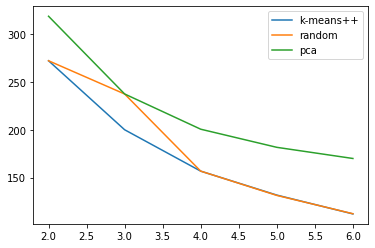

In [95]:
pd.DataFrame(dists_dict).set_index(pd.Index(range(2,7))).plot()


it seems that 4 clusters would be optimal

In [96]:
features = features_df.columns.drop(['Start Station','Unnamed: 0'])


In [100]:
def print_metrics(data, estimator):
    print('Cluster sizes: ', Counter(estimator.labels_).values())

def fit_kmeans(data, num_clusters, init_method):
    if init_method == 'pca':
        pca = PCA(n_components=num_clusters).fit(data)
        estimator = KMeans(init=pca.components_, n_clusters=num_clusters)
    else:
        estimator = KMeans(init=init_method, n_clusters=num_clusters)
    
    estimator.fit(data)
    return estimator

def draw_cluster_plot(iris_df, estimator, figsize=(25,250), cmap_name='Set1'):
    cmap = matplotlib.cm.get_cmap(cmap_name)
    xy_toplot = list(combinations(iris_df.columns,2))
    fig, axes = plt.subplots(nrows=len(xy_toplot),ncols=1, figsize=figsize)
    i = 0
    for x_ax, y_ax in xy_toplot:
        iris_df.plot.scatter(x=x_ax, y=y_ax, c=estimator.labels_, cmap=cmap, ax=axes[i,],colorbar=True, s=50)
        i += 1
    plt.show()

In [86]:
data

array([[ 2.28932858e+00, -8.25248834e-01,  4.33448981e-01,
        -8.12608204e-02, -4.18962829e-01, -5.98646580e-01],
       [-6.89021224e-01,  1.50020003e+00, -1.90812738e+00,
        -8.58018033e-01,  8.73178534e-01,  1.81021642e+00],
       [-1.68180449e+00, -1.09609334e+00,  8.19649426e-02,
        -6.14563956e-01, -4.13965483e-01, -6.18944247e-01],
       [ 3.03762045e-01, -7.14577392e-01, -6.61164097e-01,
        -8.61366124e-01, -9.08374205e-02, -2.07226492e-01],
       [-6.89021224e-01, -4.60685215e-01, -1.04045729e+00,
        -6.80090888e-01, -1.27157799e-01, -4.07639317e-02],
       [-6.89021224e-01, -6.89532779e-01, -6.72998099e-01,
        -6.65263626e-01, -3.01090763e-01, -4.65926085e-01],
       [-6.89021224e-01, -6.54535084e-01, -7.05337698e-01,
        -7.36051845e-01, -6.80620328e-02, -4.30863381e-01],
       [-6.89021224e-01,  1.79548732e-01, -2.79779181e-01,
        -7.84838320e-01,  4.80011729e-01,  1.75821595e-01],
       [-6.89021224e-01, -7.60849902e-01, -3.823

In [79]:
8%2

0

k-means++


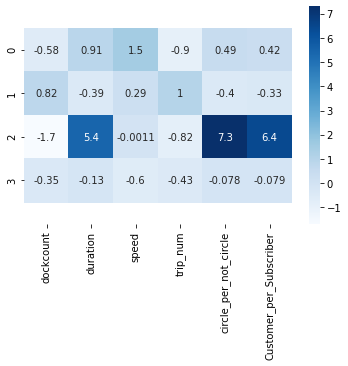

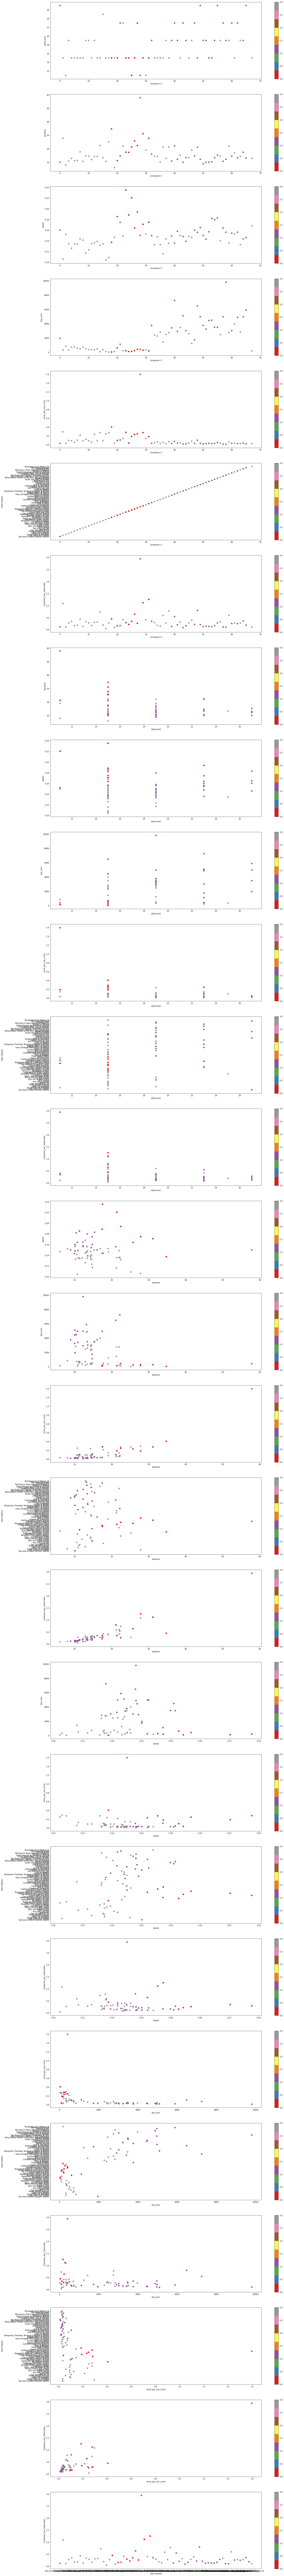

random


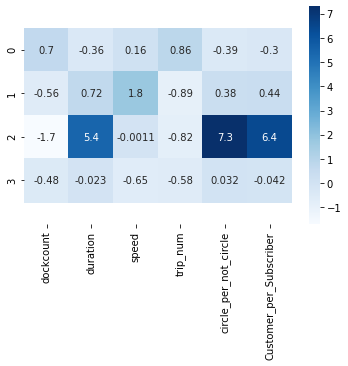

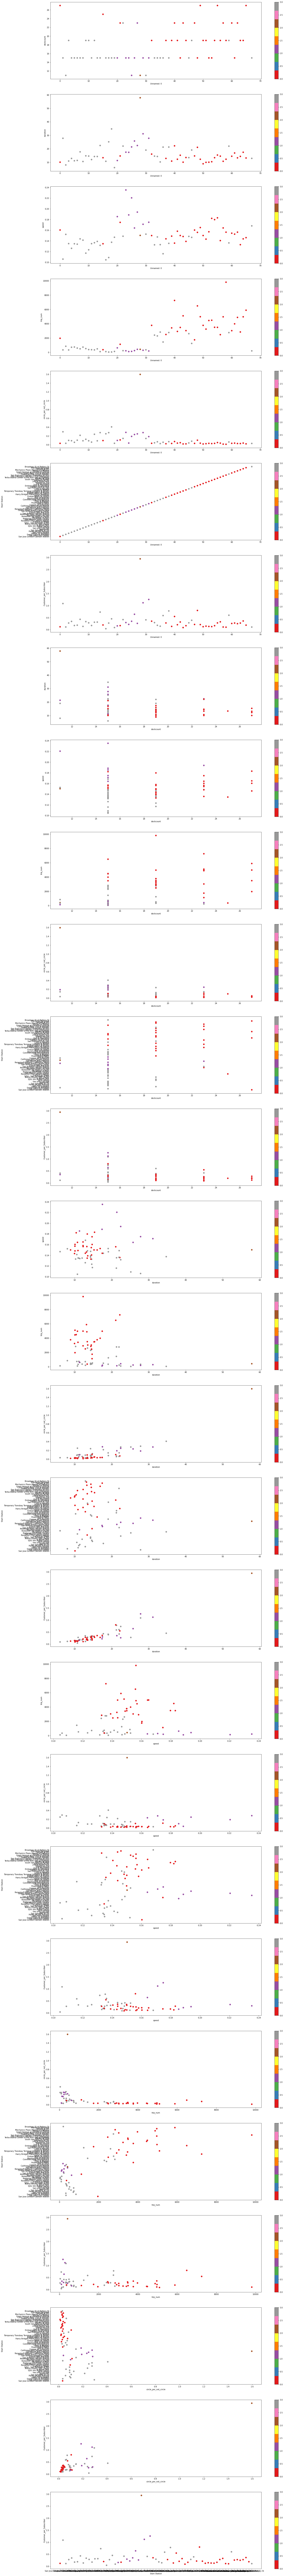

In [103]:
for init_method in ['k-means++','random']:
    print(init_method)
    estimator = fit_kmeans(data, 4, init_method)
    centers = pd.DataFrame(estimator.cluster_centers_)
    centers.columns = features
    ax = sns.heatmap(centers, annot=True, cmap='Blues')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
    plt.show()
    draw_cluster_plot(features_df.dropna(), estimator)

In [104]:
from collections import Counter, defaultdict
print(Counter(estimator.labels_))

Counter({0: 29, 3: 29, 1: 8, 2: 1})


Cluster 3 is easy to differentiate because it has much higher circle ratio, customer ratio and duration then any other.
Cluster 0 has the highest dockcount and trip num as well.
Cluster 1 has by far the highest speed and it's the second highest in duration, circle and customer ratios. 
Cluster 2 has the lowest speed but in other measures it is not really different from the others.